In [1]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

### Install dependencies

In [ ]:
pip install pandas==1.4.2 geopandas==0.10.2 matplotlib==3.5.1 mapclassify==2.4.3

### Import libraries

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import datetime
import matplotlib.pyplot as plt
import geopandas
import mapclassify
import urllib.request
import zipfile

In [4]:
# Dataset is available in several formats, we use CSV for this sample
dataset_url = "https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/bing_covid-19_data/latest/bing_covid-19_data.csv"
# Download the data and load it into a Data Frame
urllib.request.urlretrieve(dataset_url, )
df = pd.read_csv("bing_covid-19_data.csv",low_memory = False)

In [5]:
# Get only the data for United States, on a specific day, at the state level.
show_for_day = "2021-01-01"
df_slim = df.loc[(df["country_region"] == "United States") & (df["admin_region_1"].notna()) & (df["admin_region_2"].isna()) & (df["updated"] == show_for_day) ] 
# Rename the state column so we can easily merge with the geopandas dataframe
df_slim.rename({"admin_region_1":"NAME"}, axis = 1, inplace = True)

### Get the [US Census](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html) data to create the map

In [6]:
output_zip_name = "cb_2018_us_state_500k.zip"
extraction_dir = "us_maps/"
urllib.request.urlretrieve("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip", output_zip_name)
# Unzip the file
with zipfile.ZipFile(output_zip_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)
    print("Maps downloading and extraction completed!")

Maps downloading and extraction completed!


### Merge the geographic information with the covid data and display on map.
We show a heatmap with deaths for a specific day.

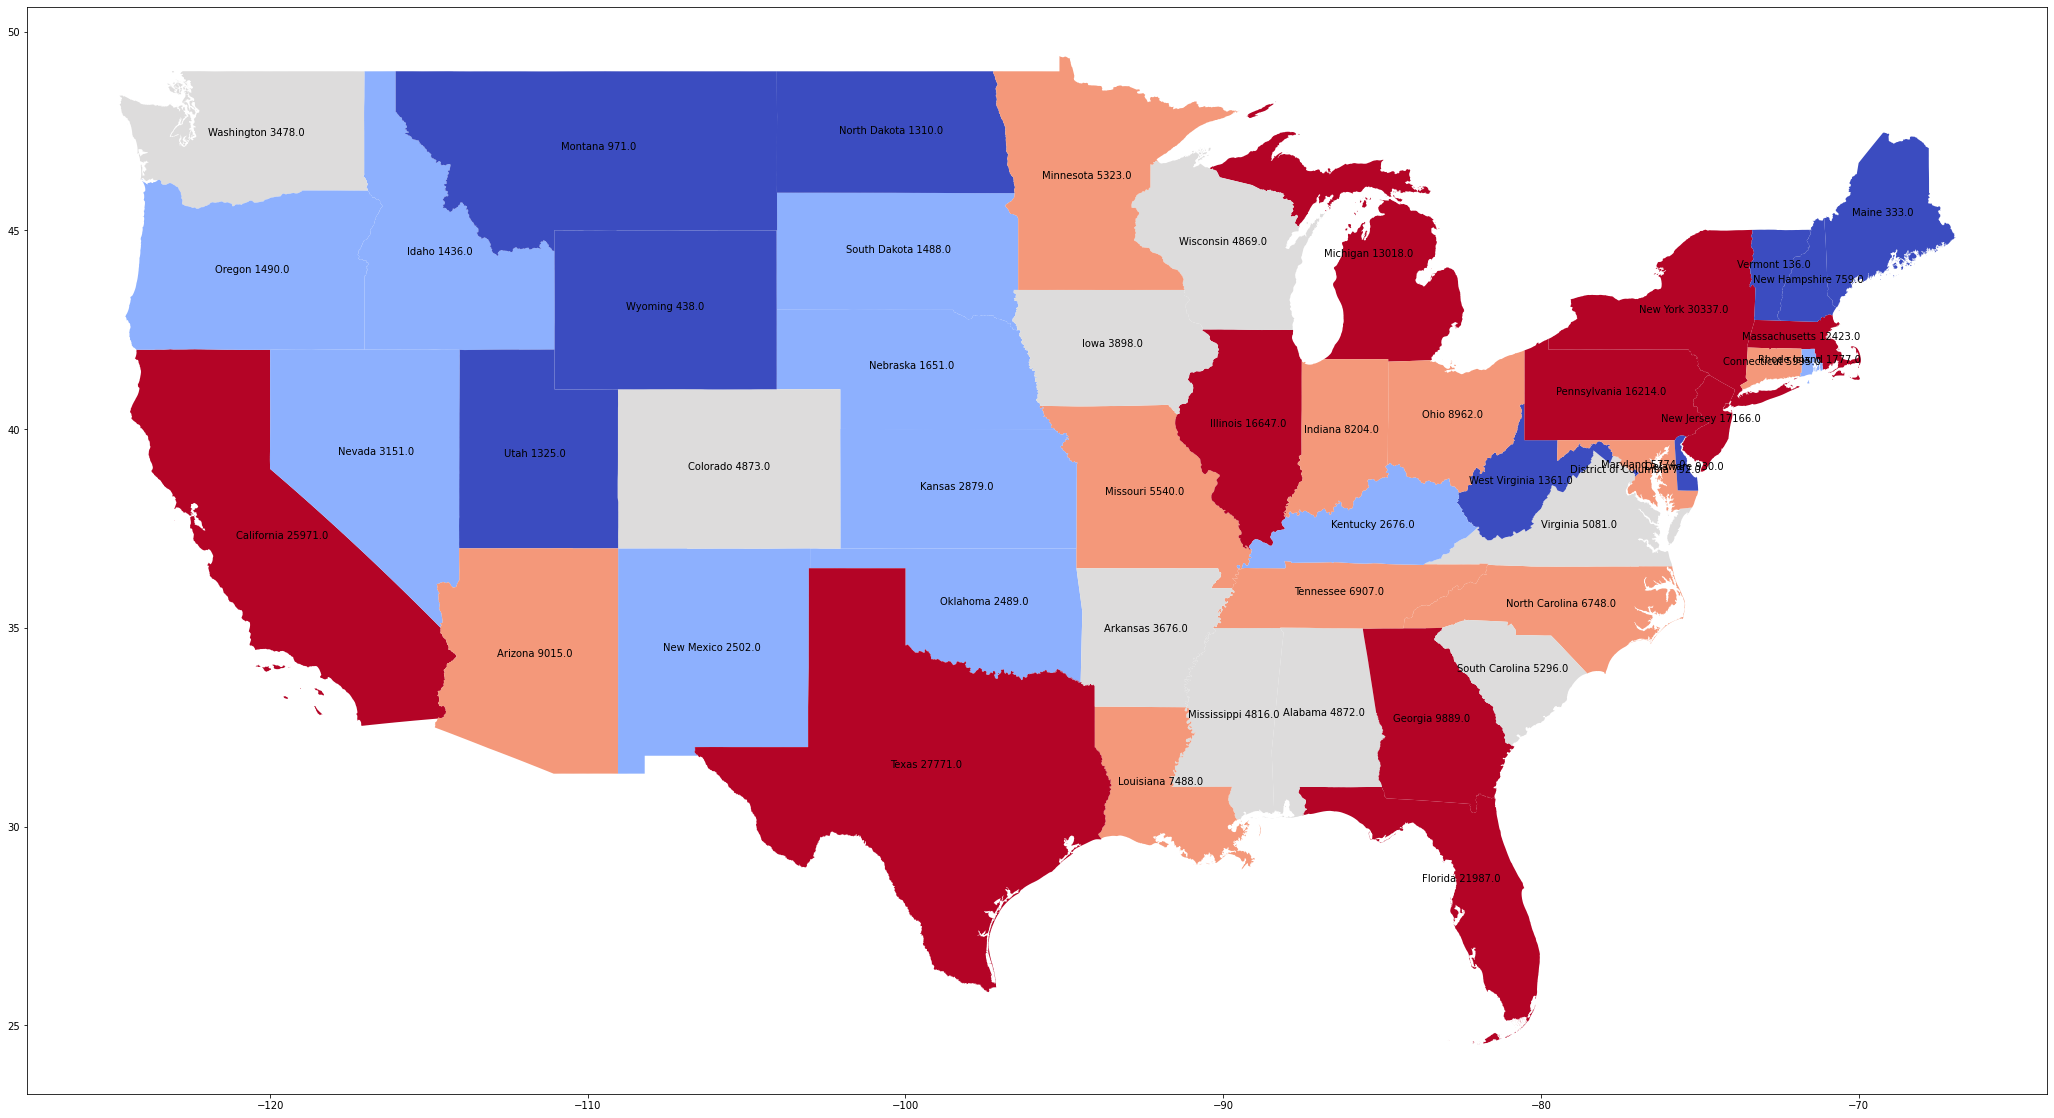

In [8]:
geo_states = geopandas.read_file(extraction_dir + "cb_2018_us_state_500k.shp")
geo_states = geo_states.loc[(geo_states["STATEFP"].astype(int) < 60) & (geo_states["STATEFP"] != "02")& (geo_states['STATEFP'] != "15")]
geo_merge = geo_states.merge(df_slim,on='NAME')
ax = geo_merge.plot(column = "deaths",scheme = "quantiles",figsize = (50,20),cmap = "coolwarm")
geo_merge.apply(lambda x: ax.annotate(text = x["NAME"] + " " + str(x["deaths"]), xy = x.geometry.centroid.coords[0], ha = "center"), axis = 1);